In [3]:
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
import pdb
import os
from PIL import Image

In [4]:
def read_images_from_folder(folder_path):
    images = []
    image_names = []
    supported_formats = '.jpg'
    for filename in os.listdir(folder_path):
        if filename.endswith(supported_formats):
            img_path = os.path.join(folder_path, filename)
            try:
                with Image.open(img_path) as img:
                    images.append(np.array(img))
                    image_name = os.path.splitext(filename)[0]  # Remove the file extension
                    image_names.append(int(image_name))  # Convert the filename to integer
            except IOError:
                print(f"Failed to open {img_path}")
            except ValueError:
                print(f"Filename {filename} is not a valid integer. Skipping.")

    return np.array(images), image_names


<function matplotlib.pyplot.show(close=None, block=None)>

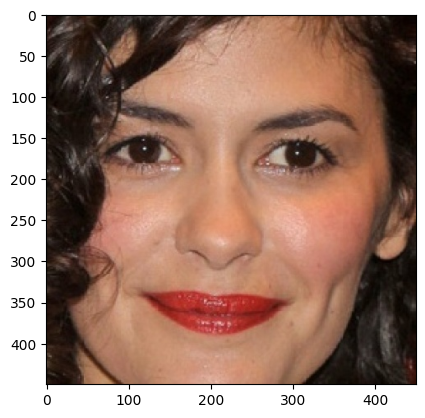

In [5]:
folder_path = r"D:\Challenge\resized"
images, image_names = read_images_from_folder(folder_path)

plt.imshow(images[0])
plt.show

In [6]:
import pandas as pd

file_path = r"D:\Challenge\train_small.csv"
data = pd.read_csv(file_path, header=None, skiprows=1)
third_column_data = data.iloc[:, 2]

y_train = []

for i in image_names:
    y_train.append(third_column_data[i])

for j in range (0,5):
    print(y_train[j], image_names[j])

y_train = np.array(y_train)
image_names = np.array(image_names)

print(y_train.shape[0])
print(image_names.shape[0])

Audrey Tautou 0
Adam Sandler 1
Albert Finney 10
Adam Sandler 100
Andy Murray 1000
5298
5298


In [7]:
num_classes = 100
input_shape = (450, 450, 3)

# images = images.astype("float32") /255
print("x_train shape:", images.shape)

x_train shape: (5298, 450, 450, 3)


In [8]:
images[0].shape
print(y_train.dtype)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

print(y_train_encoded.dtype)

<U21
int64


In [12]:
from tensorflow.keras.utils import to_categorical

model = keras.Sequential([
    # Note: You may want to adjust the number of filters, kernel size, and pooling size.
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

sub_images = np.array_split(images, 8)  # Replace 8 with the number of subsets you want
sub_y_train = np.array_split(y_train_encoded, 8)


# for i, (subset, label_subset) in enumerate(zip(sub_images, sub_y_train)):
#     print(f"Training on subset {i+1}")

#     label_subset_one_hot = to_categorical(label_subset, num_classes=num_classes)
#     print(subset.dtype, label_subset_one_hot.dtype)
#     subset = subset.astype("float32") /255
#     if i == 0:
#         # Compile the model for the first subset
#         model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     else:
#         # Load the model from the previous subset's training
#         model = keras.models.load_model(f'final_trained_model.keras')

#     # Fit the model on the current subset
#     model.fit(subset, label_subset_one_hot, epochs=5, batch_size=32)  # Adjust parameters as needed

#     # Save the model's state for the next round
#     model.save(f'final_trained_model.keras')
epochs_per_subset = 5  # Epochs to train on each subset

for epoch in range(epochs_per_subset):
    for i, (subset, label_subset) in enumerate(zip(sub_images, sub_y_train)):
        print(f"Training on subset {i+1}, epoch {epoch+1}")

        # Convert labels to one-hot encoding
        label_subset_one_hot = to_categorical(label_subset, num_classes=num_classes)

        # Normalize the image data
        subset = subset.astype("float32") / 255

        # Compile the model for the first subset of the first epoch
        if i == 0 and epoch == 0:
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Fit the model on the current subset
        model.fit(subset, label_subset_one_hot, batch_size=32)

# After training on all subsets for all epochs, save the model
model.save('final_trained_model.keras')

Training on subset 1, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.0093 - loss: 10.8025
Training on subset 2, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.0187 - loss: 4.6097
Training on subset 3, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.0057 - loss: 4.6059
Training on subset 4, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.0164 - loss: 4.6036
Training on subset 5, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.0092 - loss: 4.6039
Training on subset 6, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.0046 - loss: 4.6034
Training on subset 7, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.0116 - loss: 4.6021
Training on subset 8, epoch 1
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.0059 - loss: 4.6055
Training on subset 1, epoch 2
21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.0123 - loss: 4.6050
Training on subset 2, epoch 2
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - a